# House-Price-Prediction

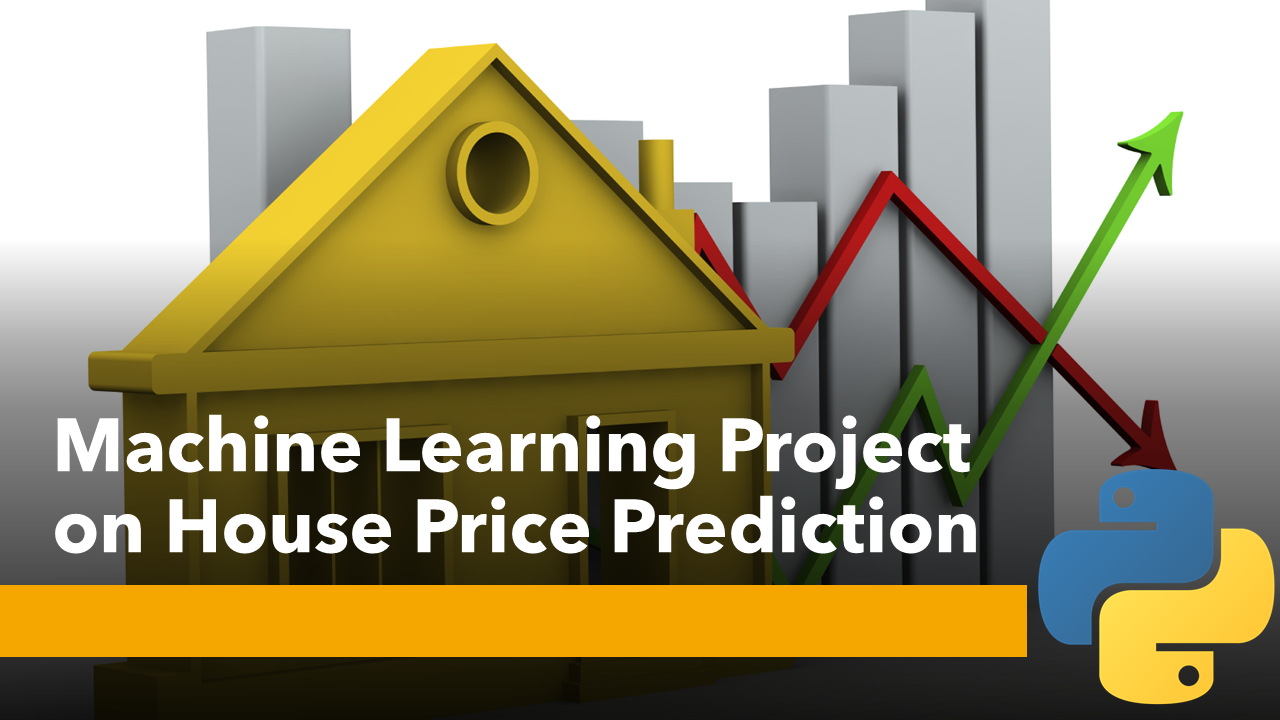

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pt
import seaborn as sb
import sklearn
import warnings
warnings.filterwarnings('ignore')

# Load the Dataset

In [2]:
df = pd.read_csv("Dataset/Housing.csv")

In [6]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [7]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [8]:
df.tail()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished
544,1750000,3850,3,1,2,yes,no,no,no,no,0,no,unfurnished


# Basic Information of Dataset

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [11]:
df.shape

(545, 13)

In [12]:
df.size

7085

In [13]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [14]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

**Check for null values**

In [15]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

**Preprocessing**

In [17]:
# Converting all non-numeric data columns to numeric form

from sklearn.preprocessing import LabelEncoder
categ = ["mainroad","guestroom","basement","hotwaterheating","airconditioning","prefarea","furnishingstatus"]

le = LabelEncoder()
df[categ] = df[categ].apply(le.fit_transform)

In [17]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0


# Data Visualization

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

**PairPlot**

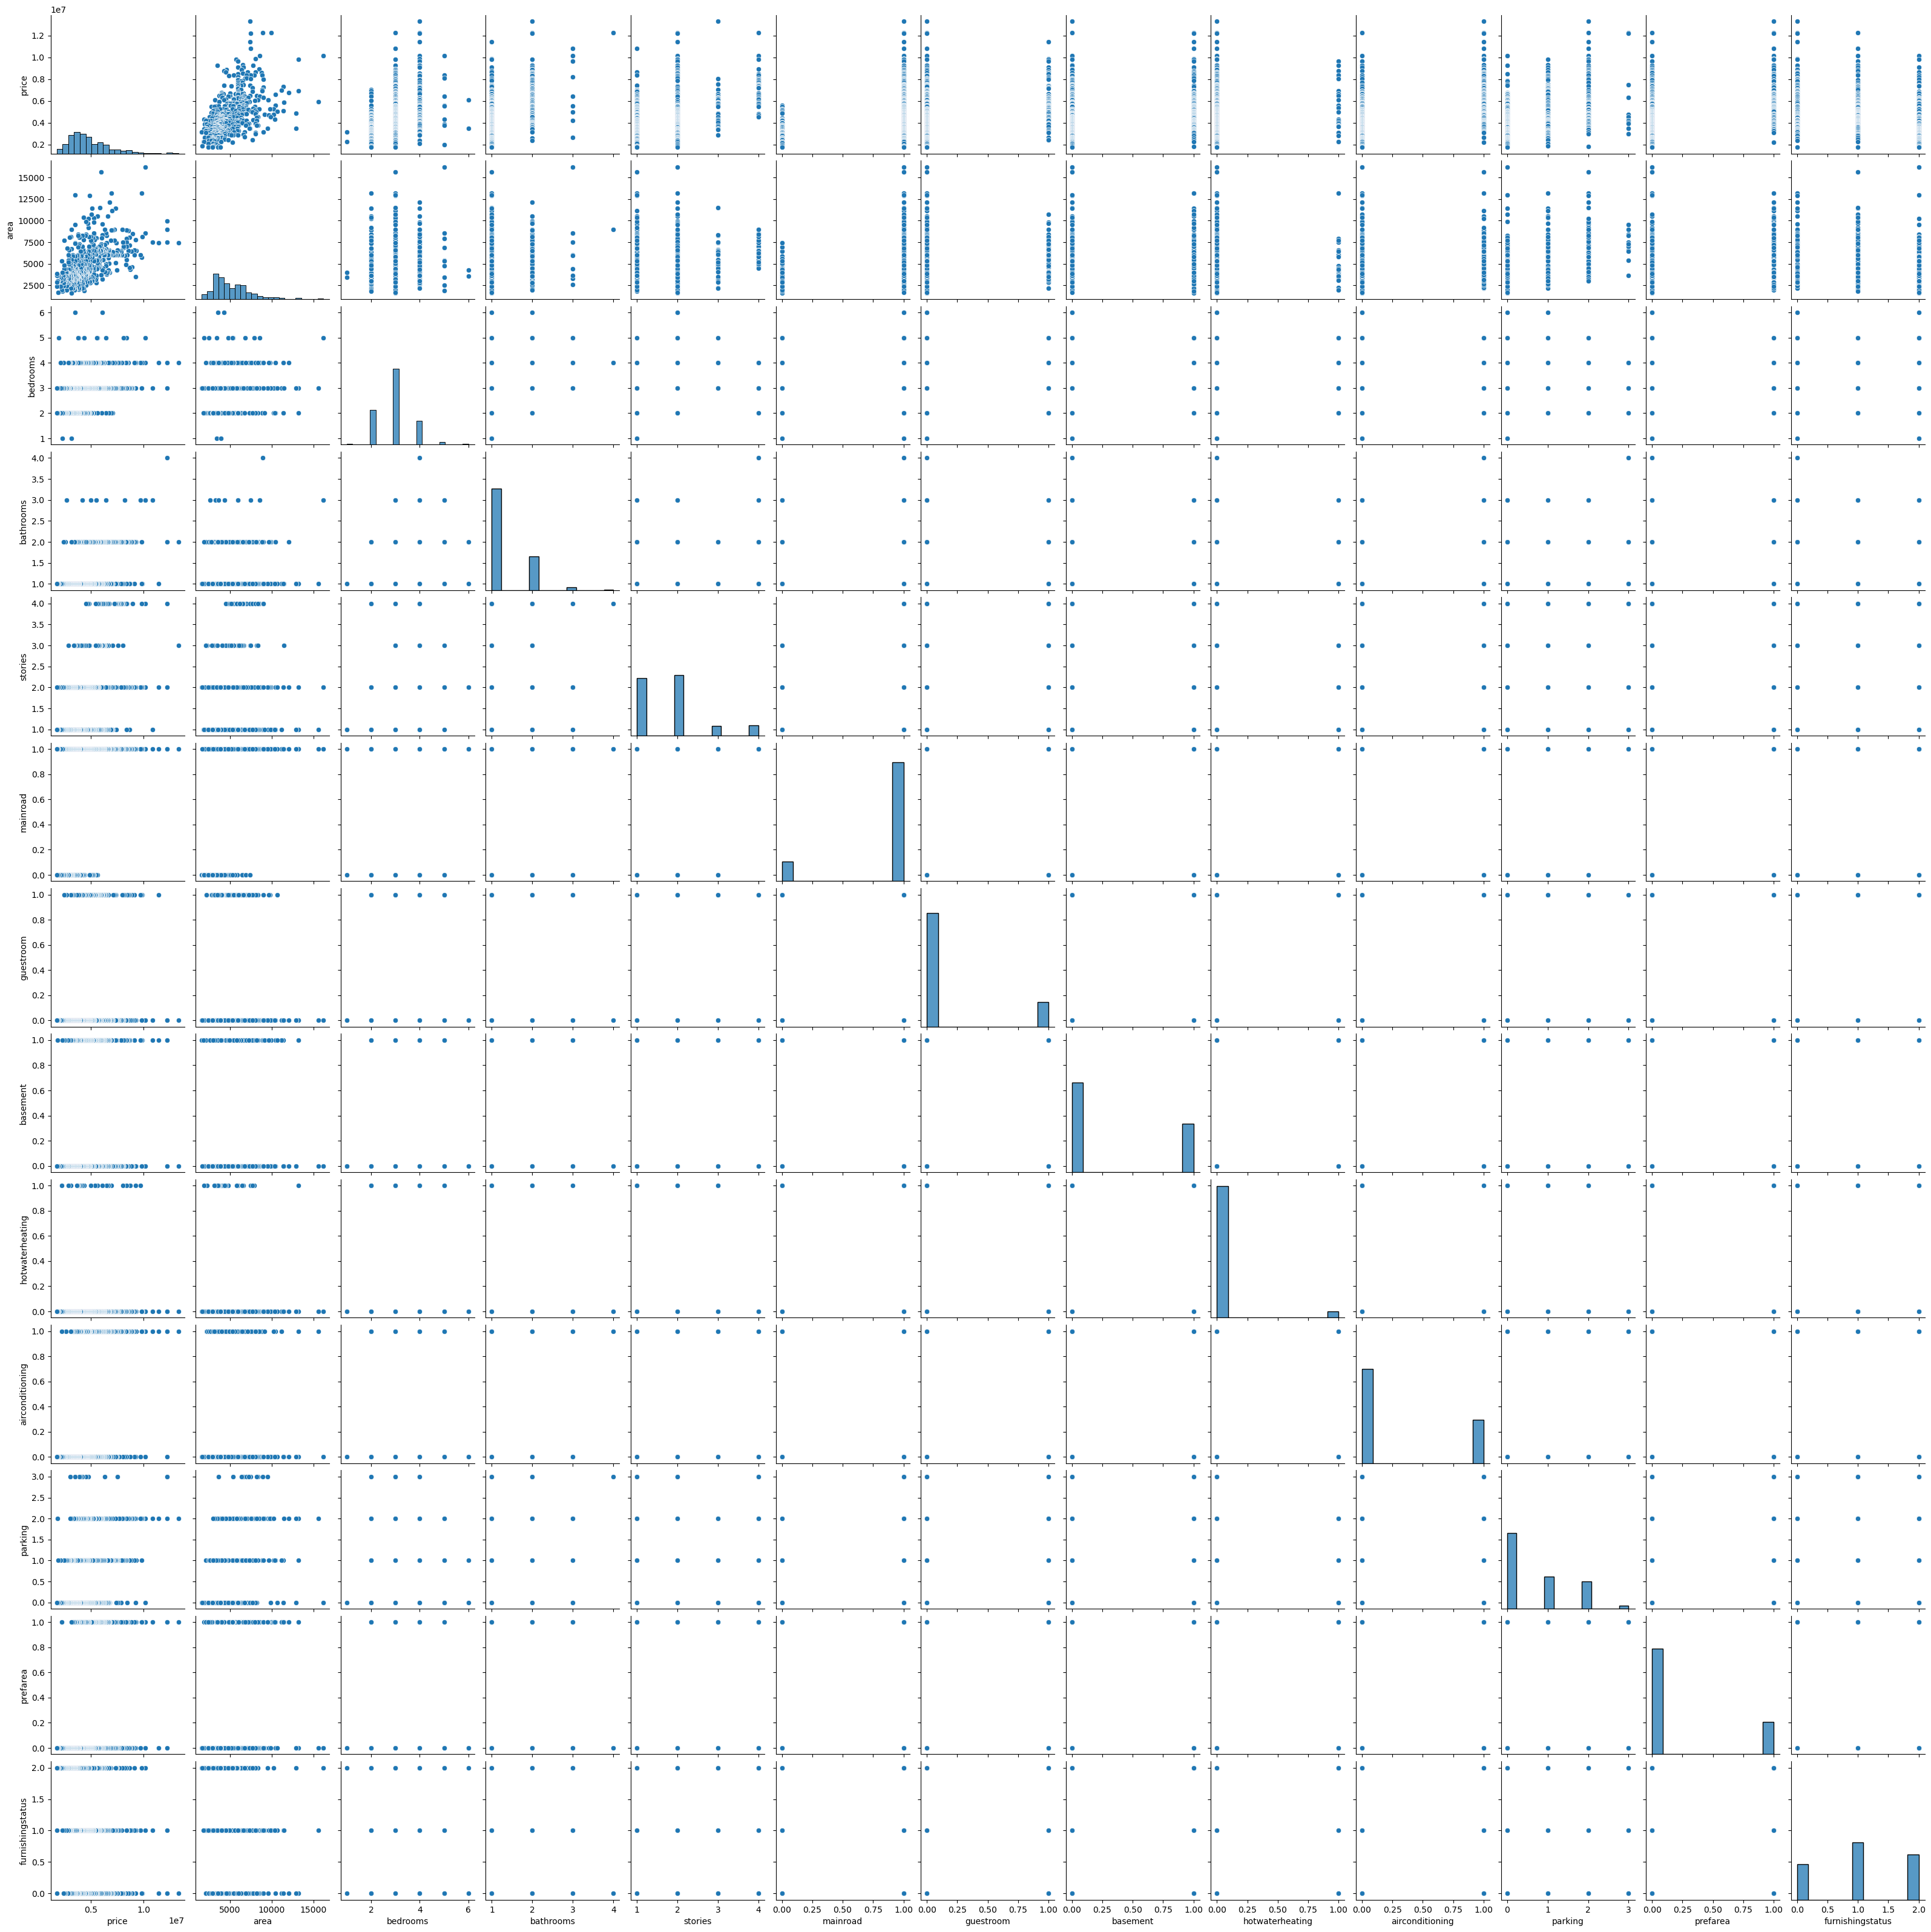

In [242]:
sns.pairplot(df)

**HeatMap**

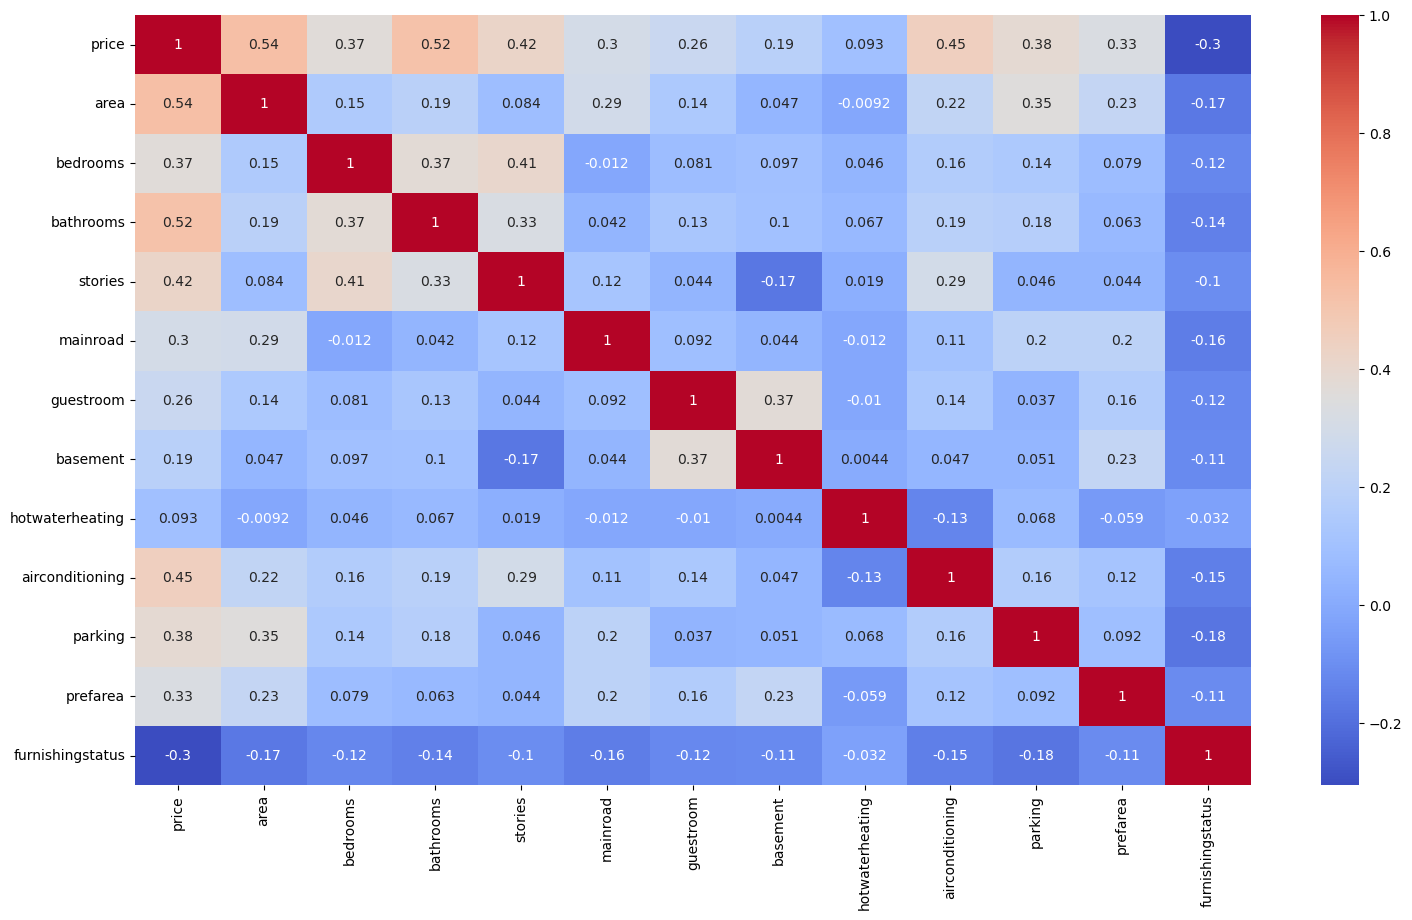

In [20]:
pt.figure(figsize=(18,10))
sb.heatmap(df.corr(), annot = True, cmap = 'coolwarm')
pt.show()

**Histogram**

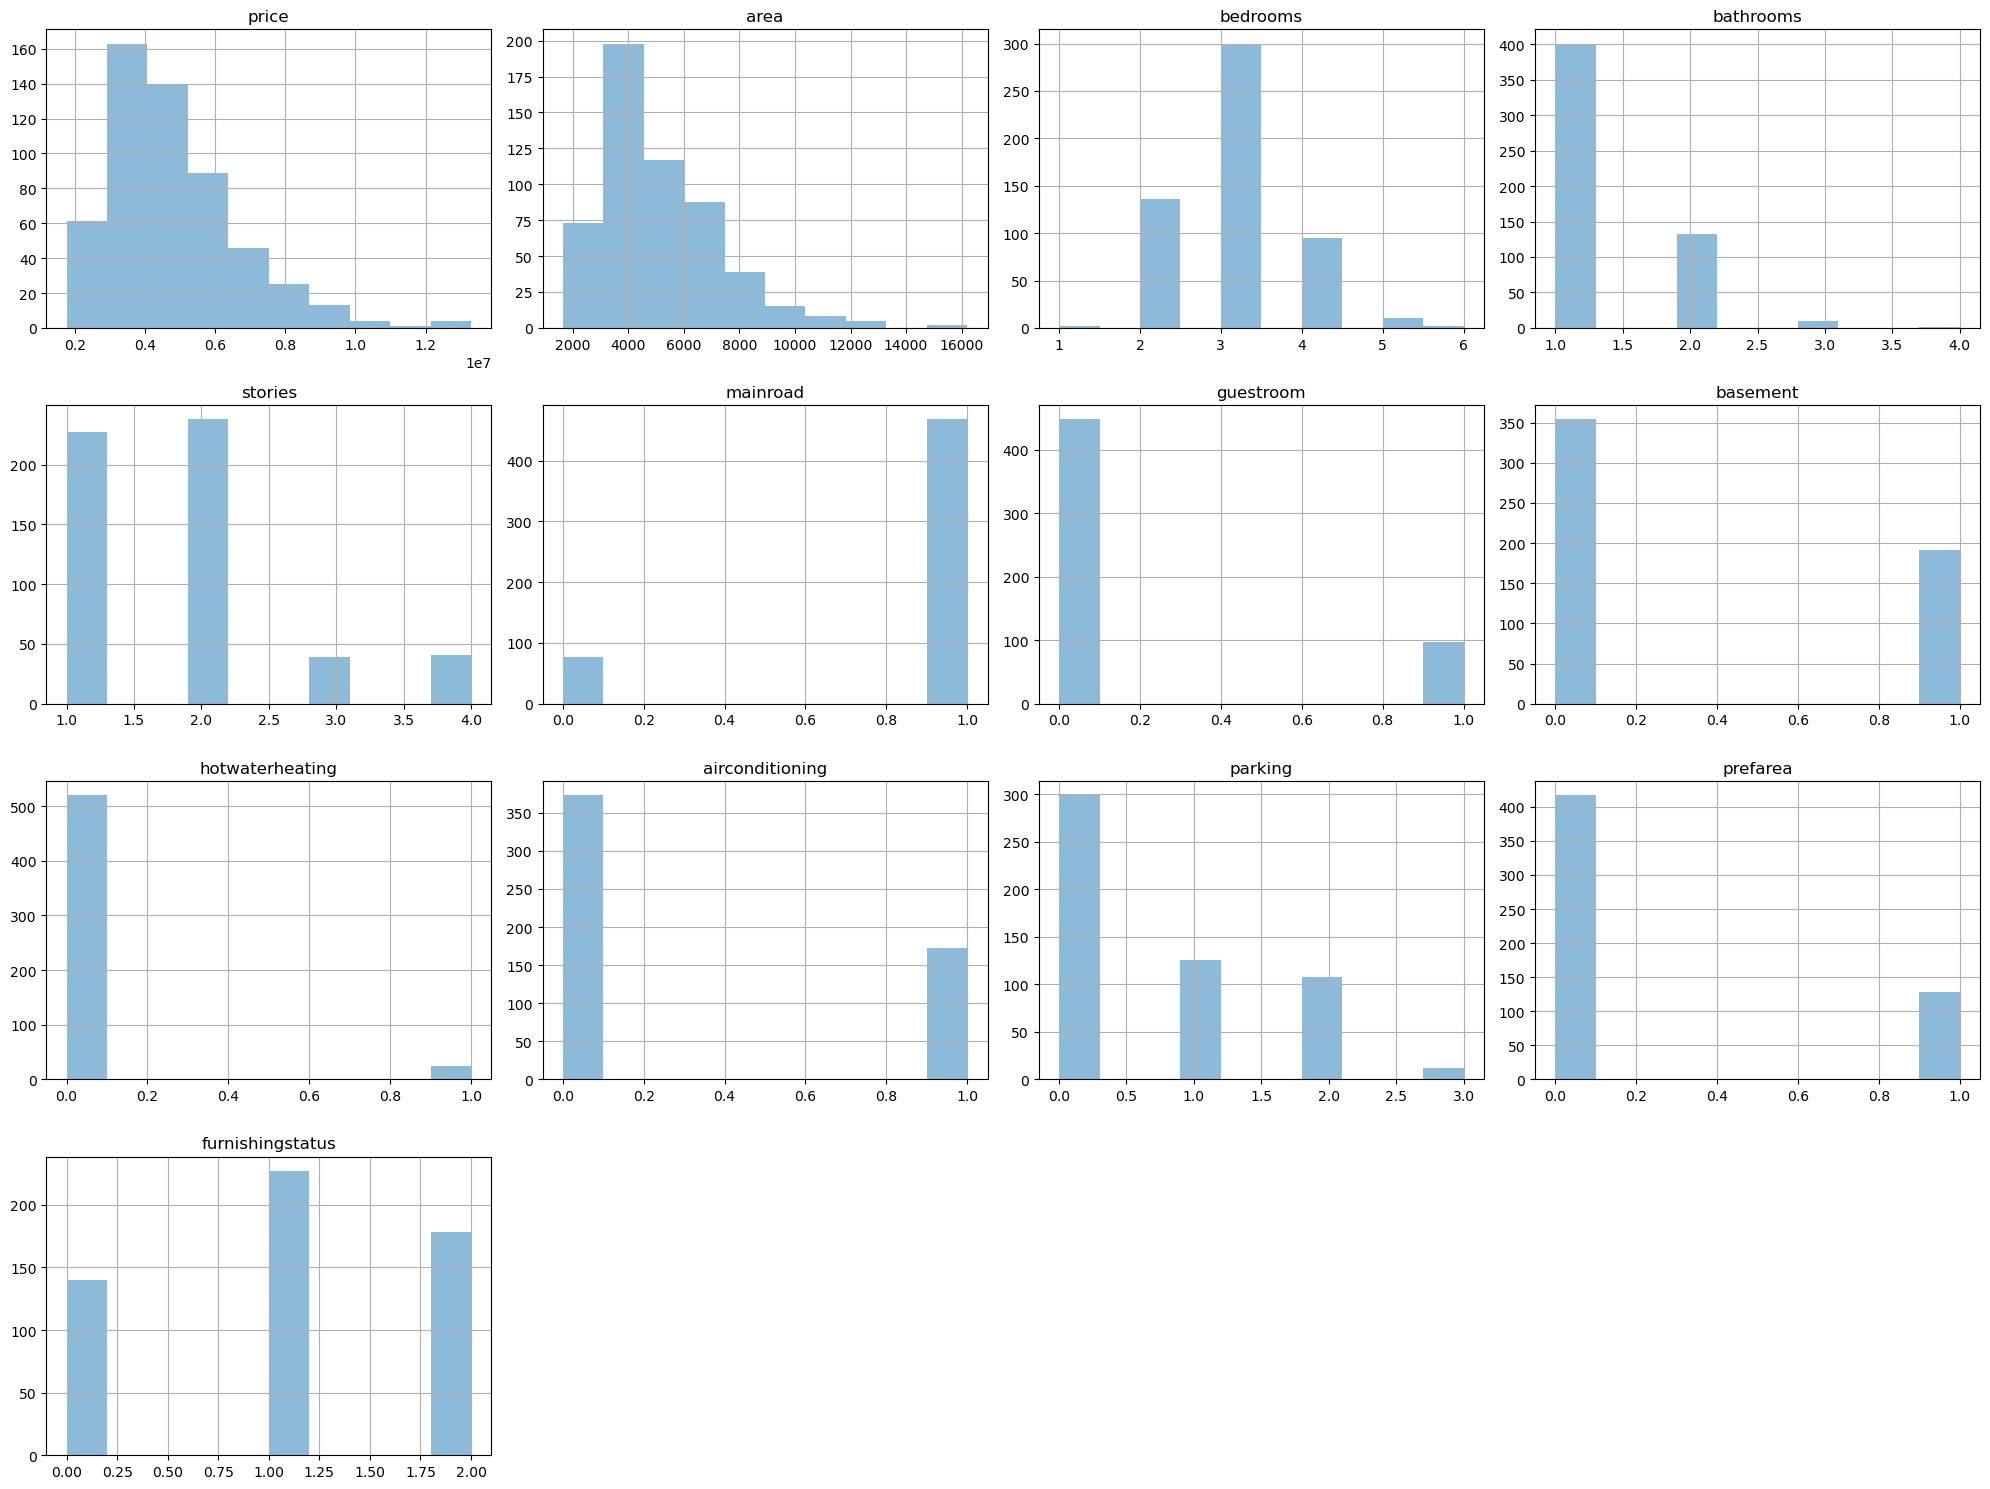

In [25]:
import matplotlib.pyplot as plt
df.hist(alpha=0.5, figsize=(20, 15))
plt.tight_layout()
plt.show()

**ScatterPlot**

In [230]:
import seaborn as sns 

[]

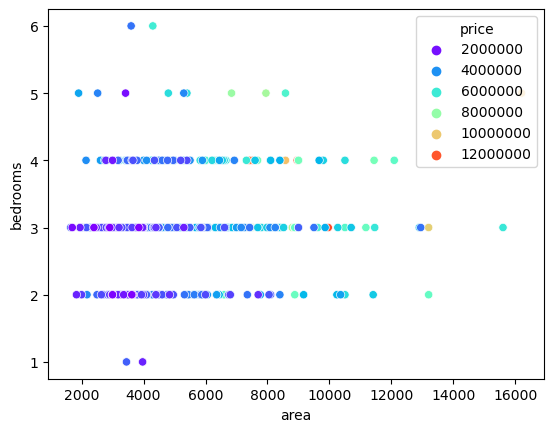

In [231]:
# plotting a scatterplot using seaborn 
sns.scatterplot(data=df, x='area', 
                y='bedrooms', hue='price', palette='rainbow') 
plt.plot() 

[]

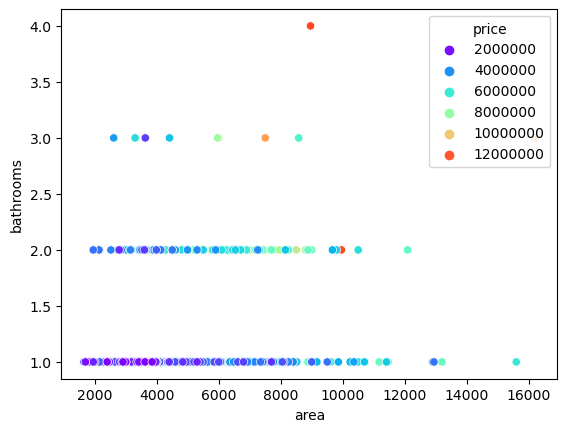

In [233]:
# plotting a scatterplot using seaborn 
sns.scatterplot(data=df, x='area', 
                y='bathrooms', hue='price', palette='rainbow') 
plt.plot() 

[]

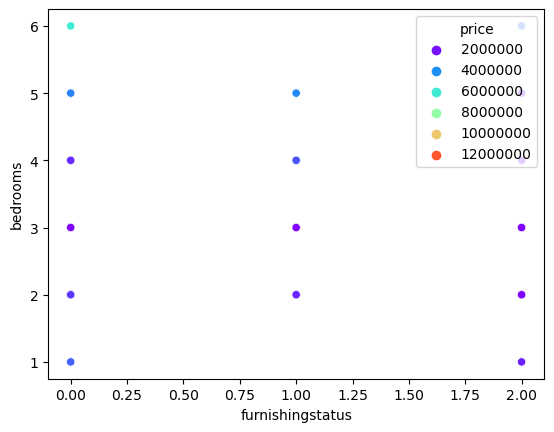

In [234]:
# plotting a scatterplot using seaborn 
sns.scatterplot(data=df, x='furnishingstatus', 
                y='bedrooms', hue='price', palette='rainbow') 
plt.plot() 

**BarPlot**

In [4]:
from matplotlib import pyplot as plt

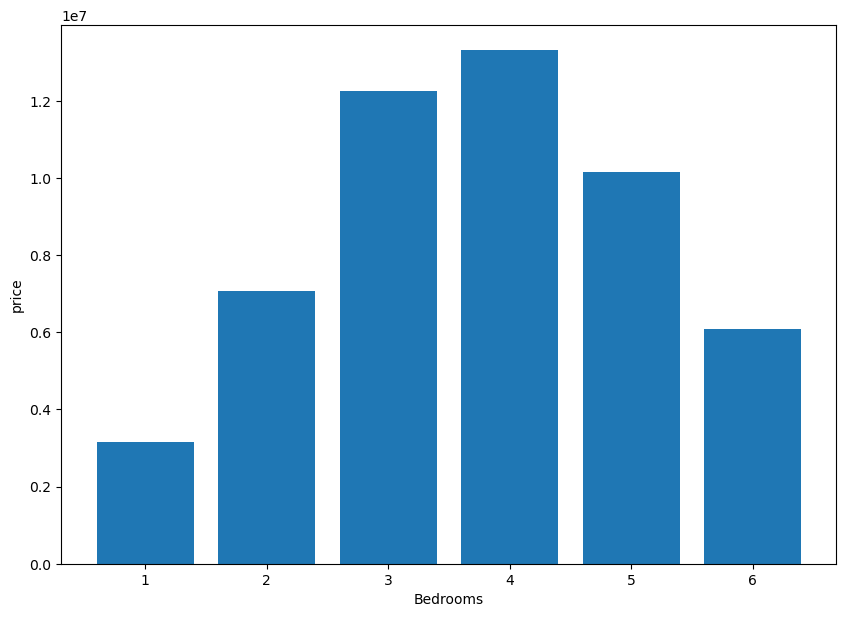

In [247]:
feature = df['bedrooms']
price = df['price']
 
# Figure Size
fig = plt.figure(figsize =(10, 7))

plt.xlabel("Bedrooms")
plt.ylabel("price")
 
# Horizontal Bar Plot
plt.bar(feature, price)
 
# Show Plot
plt.show()

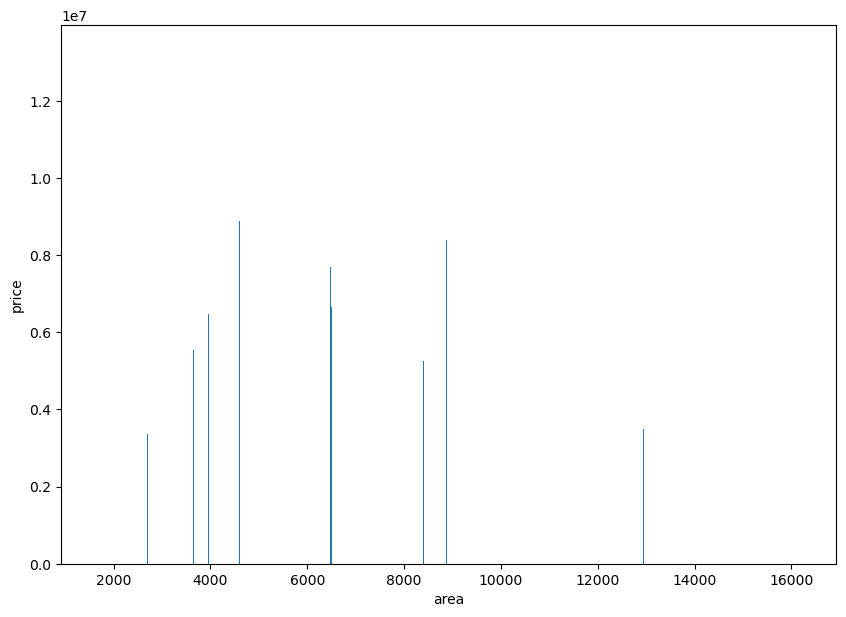

In [6]:
feature = df['area']
price = df['price']
 
# Figure Size
fig = plt.figure(figsize =(10, 7))

plt.xlabel("area")
plt.ylabel("price")
 
# Horizontal Bar Plot
plt.bar(feature, price)
 
# Show Plot
plt.show()

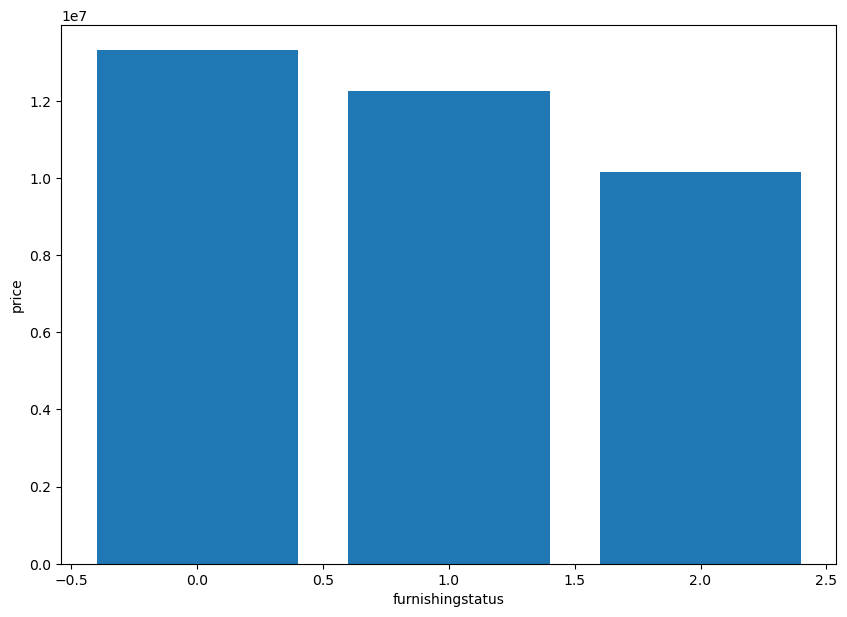

In [249]:
feature = df['furnishingstatus']
price = df['price']
 
# Figure Size
fig = plt.figure(figsize =(10, 7))

plt.xlabel("furnishingstatus")
plt.ylabel("price")
 
# Horizontal Bar Plot
plt.bar(feature, price)
 
# Show Plot
plt.show()

# Model Training


In [18]:
from sklearn.model_selection import train_test_split

**Splitting the dataset into training data and Test Data**

In [19]:
# input data
X = df.drop(columns=['price'])
# output data
Y = df['price']
# split the data for train and test
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=10)

**Linear Regression**

In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
model = LinearRegression()

In [22]:
model.fit(x_train,y_train)

LinearRegression()

**Accuracy**

In [23]:
print("Linear Regression Accuracy: ", model.score(x_test, y_test) * 100)

Linear Regression Accuracy:  74.2384108045443


**Linear Relation**

In [24]:
predictions = model.predict(x_test)

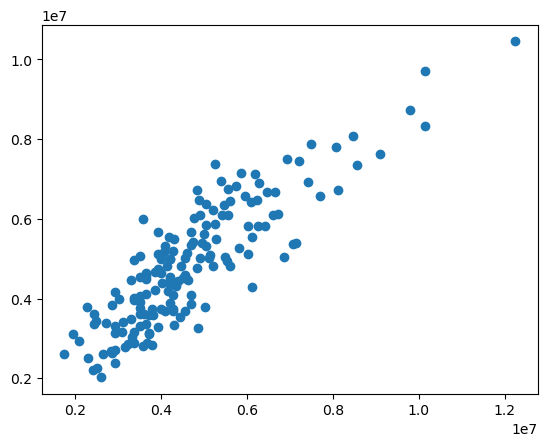

In [25]:
plt.scatter(y_test,predictions)

**Evaluation**

In [26]:
y_predict = model.predict(x_test)

In [27]:
from sklearn.metrics import r2_score,mean_absolute_error
score = r2_score(y_test,y_predict)
mae = mean_absolute_error(y_test,y_predict)

In [28]:
score

0.742384108045443

In [29]:
mae

704387.0815988069

# Save the Model

In [30]:
import pickle

In [31]:
filename = 'Housing_model.pkl'
try:
    with open(filename, 'wb') as file:
        pickle.dump(model, file)
    print("Model saved successfully.")
except Exception as e:
    print(f"Error saving the model: {e}")

Model saved successfully.


**Test the Model**

In [32]:
x_test.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
482,3150,3,1,2,0,0,0,0,0,0,0,2
314,4040,2,1,2,1,0,0,0,0,1,0,1
383,4500,4,2,2,1,0,1,0,0,2,0,0
487,5400,4,1,2,1,0,0,0,0,0,0,2
43,6000,4,2,4,1,0,0,0,0,2,0,1


In [33]:
load_model = pickle.load(open(filename, 'rb'))

**Predict Price**

**'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'**

In [34]:
load_model.predict([[3100, 3, 1, 2, 1, 0, 1, 0, 1, 2, 1, 2]])

array([5864279.20067412])